In [134]:
import pandas as pd

data=pd.read_csv("MeMas_5min.csv",header=0,infer_datetime_format=True,parse_dates=['Data'],index_col=['Data'])
daily_data=data.resample('D').sum()
daily_data = daily_data.truncate('2019-04-01','2019-11-20')
daily_data

,Ativa
Data,
2019-04-01,24536.16
2019-04-02,25168.32
2019-04-03,26292.96
2019-04-04,26976.24
2019-04-05,28097.28
...,...
2019-11-16,14696.64
2019-11-17,12008.16
2019-11-18,24819.84


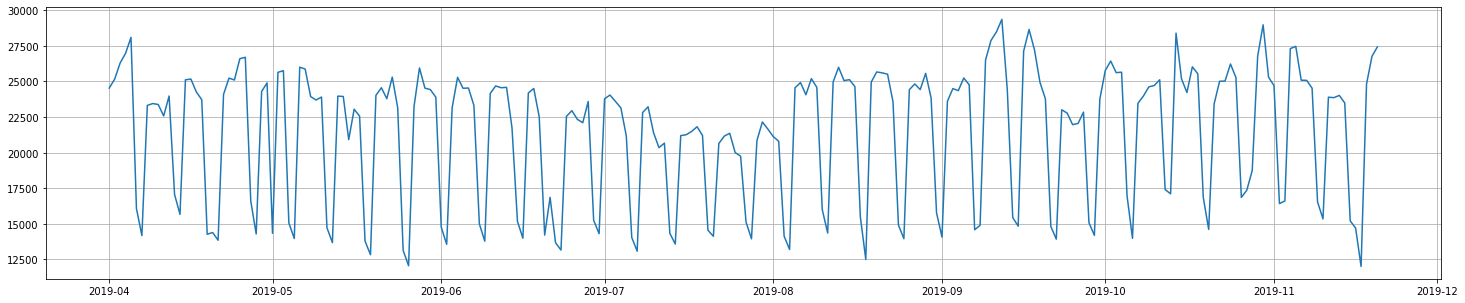

In [135]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25,5))
plt.plot(daily_data)
plt.grid()

In [136]:
daily_data['ds'] = daily_data.index
q = range(daily_data.size)
d = {'ds': daily_data['ds'], 'y': daily_data['Ativa']}
df = pd.DataFrame(data = d).reset_index().drop(['Data'],axis=1)
df = df[0:int(df.size-(round(df.size*(3/4))))]
df

,ds,y
0,2019-04-01,24536.16
1,2019-04-02,25168.32
2,2019-04-03,26292.96
3,2019-04-04,26976.24
4,2019-04-05,28097.28
...,...,...
112,2019-07-22,20644.56
113,2019-07-23,21160.80
114,2019-07-24,21361.68
115,2019-07-25,20005.92


In [137]:
from fbprophet import Prophet

m = Prophet(changepoint_prior_scale=0.1,yearly_seasonality=20)
m.add_country_holidays(country_name='BR')
forecast = m.fit(df).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [146]:
future = m.make_future_dataframe(periods=120)
future.tail()

,ds
232,2019-11-19
233,2019-11-20
234,2019-11-21
235,2019-11-22
236,2019-11-23


In [147]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
232,2019-11-19,16351.364729,14475.373630,18323.361318
233,2019-11-20,15790.848405,13823.787047,17677.870885
234,2019-11-21,15644.071262,13755.137524,17578.177888
235,2019-11-22,15303.678564,13384.887580,17217.333621
236,2019-11-23,8008.706530,6212.669102,9943.023144


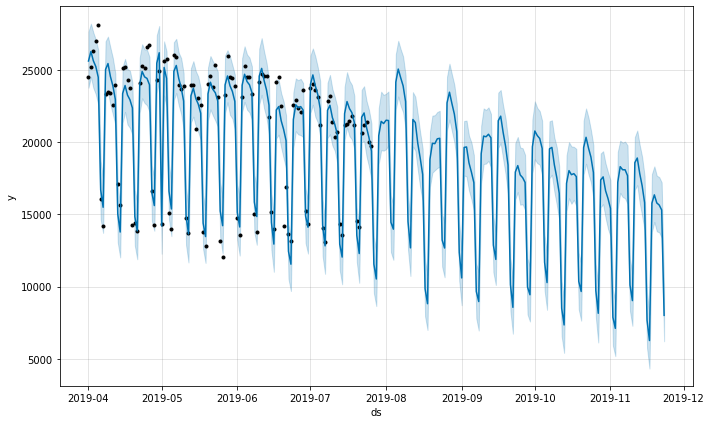

In [148]:
fig1 = m.plot(forecast)


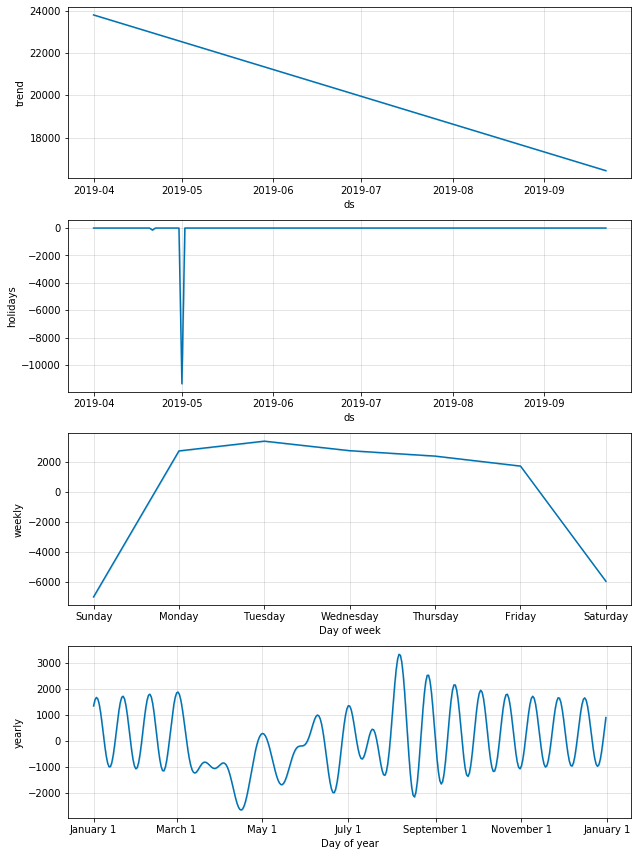

In [141]:
fig2 = m.plot_components(forecast)
